In [47]:
# Imports 
import importlib
import IsTripModel 


In [48]:
# Declare the variable to allow class reloading in the below cell
model = None

In [49]:
importlib.reload(IsTripModel)

class TrainingIsTripModel(IsTripModel.SpacyIsTripModel):
    def prepare_data(self, data):
        prepared_data = []
        for item in data:
            text = item['sentence']
            # We consider a travel when exactly two entities are present
            # We may modify this later to handle more complex travels with a list of checkpoints (like Nantes -> Paris -> Marseille)
            is_travel = len(item['entities']) == 2
            prepared_data.append((text, {"cats": {self.true_category: is_travel, self.false_category: not is_travel}}))
        return prepared_data

# Refresh the methods of the model if it was already instanciated
if model:
    model.__class__ = TrainingIsTripModel
    TrainingIsTripModel.refresh_methods(model)

In [50]:
# Load data
model = TrainingIsTripModel()

# Training

In [51]:
num_positives = len([item for item in model.train_data if item[1]["cats"]["TRAVEL"]])
num_negatives = len([item for item in model.train_data if item[1]["cats"]["NOT_TRAVEL"]])
print(f"Number of travels : {num_positives}, number of non travels : {num_negatives}")
print(f"Training example : {model.train_data[0]}")


Number of travels : 3991, number of non travels : 4009
Training example : ('je cherche un billet de train pour voyager de le pouzin à saint-aubin-des-landes.', {'cats': {'TRAVEL': True, 'NOT_TRAVEL': False}})


In [52]:
# Model creation
model.load_model("fr_core_news_md")

In [53]:
# Training
model.train(4)

Iteration 1, losses : {'textcat': 25.667948741355346}
Iteration 2, losses : {'textcat': 1.7155648432179231}
Iteration 3, losses : {'textcat': 0.9768313759391961}
Iteration 4, losses : {'textcat': 1.2829990836638523}


In [54]:
# Save the model
model.save("model_is_trip_trained")

# Testing

In [55]:
not_trained = TrainingIsTripModel("fr_core_news_md")

Model: Trained Model


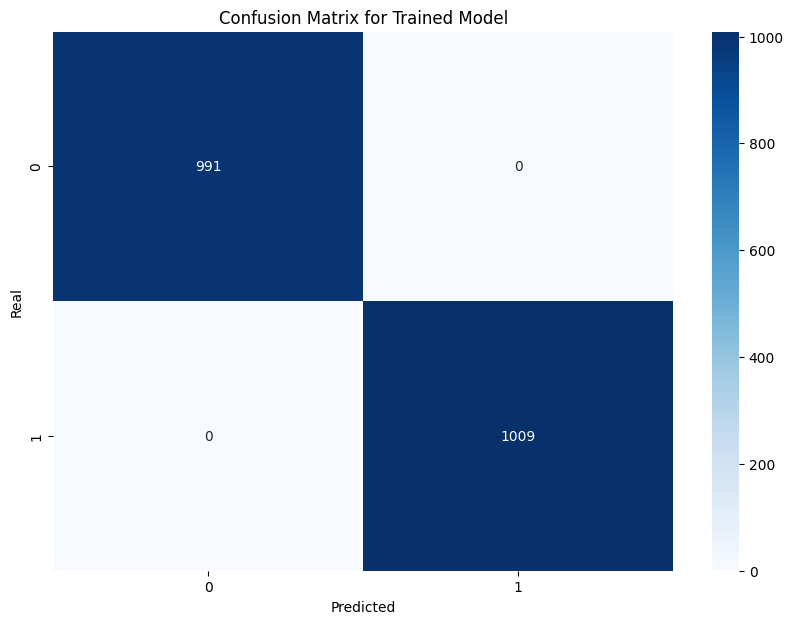

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       991
        True       1.00      1.00      1.00      1009

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Model: Not Trained Model


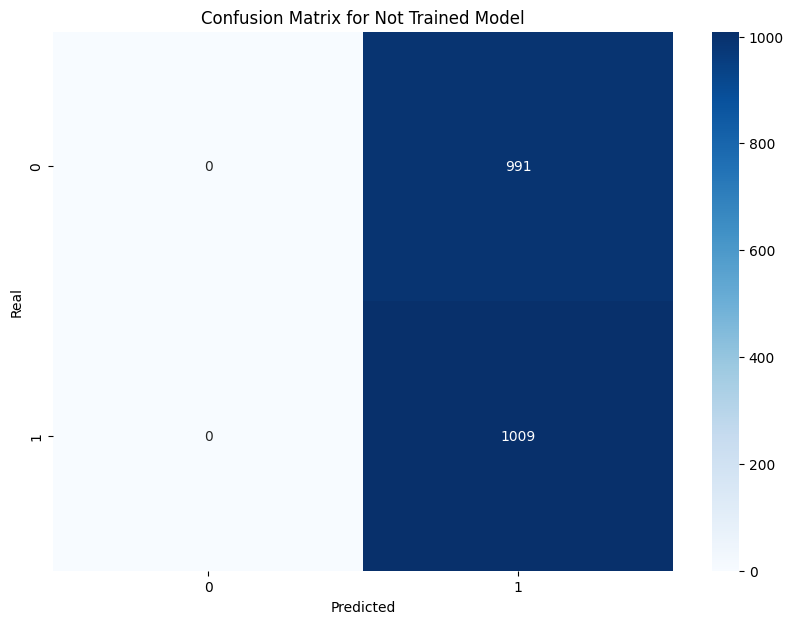

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       991
        True       0.50      1.00      0.67      1009

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.25      0.50      0.34      2000



/home/baptiste/Documents/Epitech/T-DAT-901-NAN_10/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baptiste/Documents/Epitech/T-DAT-901-NAN_10/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/baptiste/Documents/Epitech/T-DAT-901-NAN_10/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [56]:
model.evaluate_model(model.test_data, "Trained Model")
# We can test an untrained model but it raises warnings because the model is not trained yet
not_trained.evaluate_model(not_trained.test_data, "Not Trained Model")

# Validation

Model: Trained Model


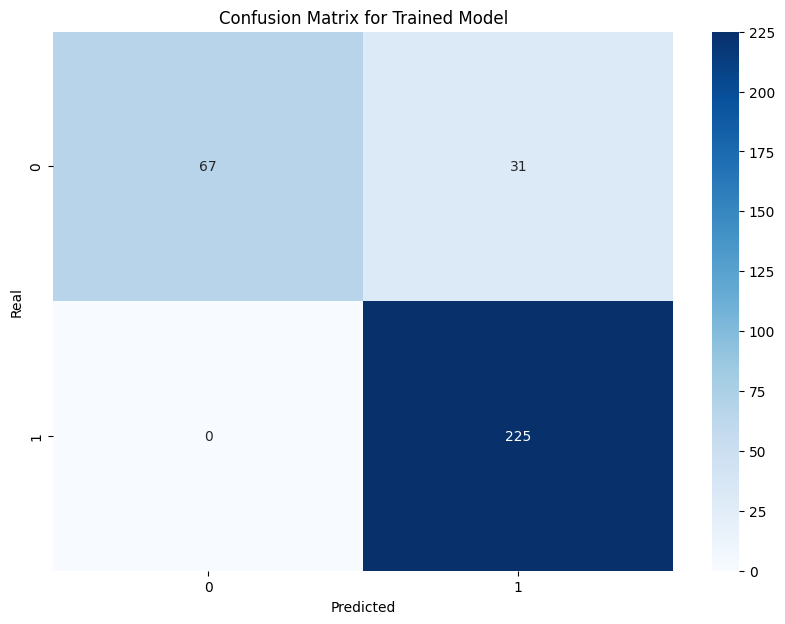

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.68      0.81        98
        True       0.88      1.00      0.94       225

    accuracy                           0.90       323
   macro avg       0.94      0.84      0.87       323
weighted avg       0.92      0.90      0.90       323



In [57]:
model.evaluate_model(model.validation_data, "Trained Model")